# Building your own ETF

In [41]:
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# DOW 30
symbols = ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "XOM", "GS", "HD", "IBM", 
           "INTC", "JNJ", "KO", "JPM", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", 
           "PG", "TRV", "UHN", "RTX", "VZ", "V", "WBA", "WMT", "DIS", "DOW"]

In [43]:
stocks = [yf.Ticker(s) for s in symbols]

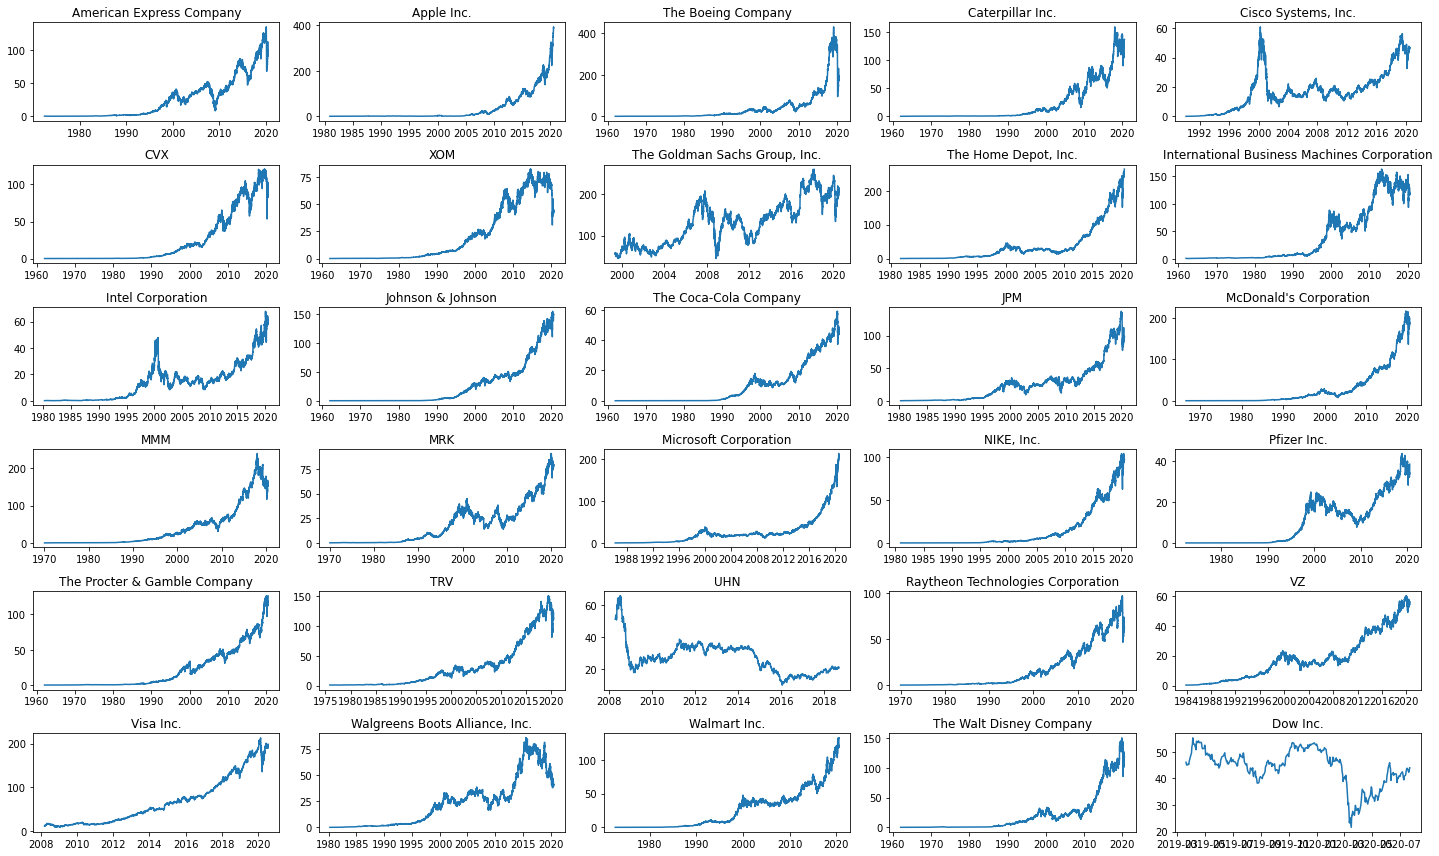

In [21]:
# VIEW
ROWS = 5
COLUMNS = 6

fig, ax = plt.subplots(COLUMNS, ROWS, figsize=(20,12))

for i in range(COLUMNS):
    for j in range(ROWS):
        stock = stocks[i*ROWS+j]
        hist = stock.history(period="max")
        ax[i, j].plot(stock.history(period="max").index, stock.history(period="max")["Close"])
        try:
            ax[i, j].set_title(stock.info["longName"])
        except:
            ax[i, j].set_title(symbols[i*ROWS+j])

fig.tight_layout()
plt.show()

## Market cap and weighting

First we find the individual component market caps along with the total market cap of the index in order to find the correct weighting of each individual stock to make an ETF that reflects the actual index in a proper manner.

\begin{equation*}
Weighting + \frac{Market\;cap\;of\;individual\;component}{The\;total\;market\;cap\;of\;all\;index\;stocks}
\end{equation*}

In [49]:
def get_stock_market_caps_as_dict(symbols, stocks):
    market_caps = {}

    for sy, st in zip(symbols, stocks):
        try:
            market_caps[sy] = st.info["marketCap"]
        except:
            print(sy + ":", "No market cap info")
    return market_caps
            
market_caps = get_stock_market_caps_as_dict(symbols, stocks)

CVX: No market cap info
XOM: No market cap info
JPM: No market cap info
MMM: No market cap info
MRK: No market cap info
TRV: No market cap info
UHN: No market cap info
VZ: No market cap info
{'AXP': 77744201728, 'AAPL': 1686617849856, 'BA': 101420490752, 'CAT': 74165977088, 'CSCO': 197899190272, 'GS': 70852763648, 'HD': 285292462080, 'IBM': 114253930496, 'INTC': 258506866688, 'JNJ': 395637063680, 'KO': 208302161920, 'MCD': 147789185024, 'MSFT': 1606627622912, 'NKE': 153776914432, 'PFE': 214194241536, 'PG': 312264851456, 'RTX': 96356605952, 'V': 436835844096, 'WBA': 35259269120, 'WMT': 375686496256, 'DIS': 215000317952, 'DOW': 32821792768}


Some stocks are missing their market cap into, so these are added manualy

NOTE: These will have to be updated manually over time

In [50]:
market_caps["CVX"] = 169.97 * 10 ** 9
market_caps["XOM"] = 184.39 * 10 ** 9
market_caps["JPM"] = 300.71 * 10 ** 9
market_caps["MMM"] = 91.29 * 10 ** 9
market_caps["MRK"] = 198.85 * 10 ** 9
market_caps["TRV"] = 30.91 * 10 ** 9
market_caps["UHN"] = 289.36 * 10 ** 9
market_caps["VZ"] = 230.69 * 10 ** 9

In [52]:
print(len(market_caps))

30


In [57]:
total_index_market_cap = sum(market_caps.values())
print("Total index market cap:", total_index_market_cap / 10 ** 9, "billions")

Total index market cap: 8593.476099712 billions


In [64]:
def get_sorted_stock_weightings_as_dict(market_caps, total_index_market_cap):
    weightings = {}
    for sy, val in market_caps.items():
        weightings[sy] = val/total_index_market_cap
    
    return {k: v for k, v in sorted(weightings.items(), key=lambda item: item[1], reverse=True)}

stock_weightings = get_sorted_stock_weightings_as_dict(market_caps, total_index_market_cap)

In [65]:
stock_weightings

{'AAPL': 0.19626724160116357,
 'MSFT': 0.18695899124754,
 'V': 0.050833427477693226,
 'JNJ': 0.04603923477406998,
 'WMT': 0.0437176402071556,
 'PG': 0.03633743177181411,
 'JPM': 0.03499282438338054,
 'UHN': 0.0336720550150477,
 'HD': 0.03319872642568485,
 'INTC': 0.030081757799578165,
 'VZ': 0.026844782870546563,
 'DIS': 0.02501901622315625,
 'PFE': 0.02492521525057578,
 'KO': 0.024239569587792418,
 'MRK': 0.02313964659850095,
 'CSCO': 0.023029003394637048,
 'XOM': 0.021456974786510385,
 'CVX': 0.019778957668328923,
 'NKE': 0.017894611289737995,
 'MCD': 0.017197835114588028,
 'IBM': 0.013295426573634047,
 'BA': 0.01180203326048687,
 'RTX': 0.01121276242977266,
 'MMM': 0.010623174945824248,
 'AXP': 0.009046886361923495,
 'CAT': 0.008630497859938841,
 'GS': 0.00824494800775376,
 'WBA': 0.0041030275421586,
 'DOW': 0.0038193848900213946,
 'TRV': 0.00359691464098398}

## How many to buy?

Finally we need to figure out the amount of each stock we have to buy in order to stay as close to the accurate weighting as possible.

In [ ]:
AMOUNT_TO_INVEST = 1000000 # USD
def get_number_of_stocks_to_buy_as_dict(market_caps, total_index_market_cap):
    weightings = {}
